# Background Information and Purpose:


Analysis by Kevin Cooney

Data source: https://archive.ics.uci.edu/ml/datasets/Online+Retail

Data info: "This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail." (direct quote from data source)

The purpose of this project is to provide the company with key insights about its performance in order to guide its future decisions.  

In [2]:
%pylab inline
import pandas as pd
import seaborn as sb

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Populating the interactive namespace from numpy and matplotlib


# Import dataset

In [3]:
data = pd.read_csv("/Users/kevincooney/Desktop/data.csv", encoding='cp1252')

In [4]:
data.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Convert "InvoiceDate" to datetime 

In [6]:
data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate)

# Add new columns for analysis 

In [7]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

data["Weekday"] = data["InvoiceDate"].dt.day_name()

data["Month"] = data["InvoiceDate"].dt.month

data["Year"] = data["InvoiceDate"].dt.year

data.head(n=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Weekday,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,Wednesday,12,2010


# Preform analysis on revenue for the year

In [8]:
revbymonth = data.groupby(['Year', "Month"]).sum() 

revbymonth

Quantity   UnitPrice    CustomerID      Revenue
Year Month                                                 
2010 12       342228  260520.850  4.166977e+08   748957.020
2011 1        308966  172752.800  3.319198e+08   560000.260
     2        277989  127448.770  3.117809e+08   498062.650
     3        351872  171486.510  4.223298e+08   683267.080
     4        289098  129164.961  3.541194e+08   493207.121
     5        380391  190685.460  4.400088e+08   723333.510
     6        341623  200717.340  4.264710e+08   691123.120
     7        391116  171906.791  4.209226e+08   681300.111
     8        406199  150385.680  4.219478e+08   682680.510
     9        549817  199235.212  6.229373e+08  1019687.622
     10       570532  263434.090  7.727017e+08  1070704.670
     11       740286  327149.850  1.007384e+09  1461756.250
     12       226333  133915.660  2.702551e+08   433668.010

Percent of change calculations:

In [9]:
((1461756.250 -560000.260)/ 560000.260)*100

161.02778059424472

In [10]:
((1461756.250 - 1070704.670 )/ 1070704.670)*100

36.52282379603333

In [11]:
((433668.010 - 1461756.250 )/ 1461756.250)*100

-70.33239912605129

In [12]:
((433668.010 - 560000.260 )/ 560000.260)*100

-22.55931988317291

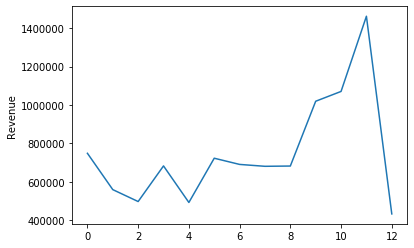

In [13]:
months = range(0,13)

ax1= sb.lineplot(x = months, y = revbymonth["Revenue"], data=data)


*0 = December 2010, 12 = December 2011

#### Snapshot of 2011 calendar year:  

From January 2011 to November 2011 revenue grew at a rate of 161 percent.

The largest month to month INCREASE in revenue occured between October and November, with a 37 percent increase in revenue.

The largest month to month DECREASE in revenue occured between November and December, with a 70 percent decrease in revenue.

At year end the company is left with an overall -23 percent change in revenue, due to the extreme change in sales during December.

In [14]:
revsum = data.Revenue.sum()

Total revenue (2011) = 

In [15]:
revsum

9747747.933999998

# Who were the biggest customers over the year? Where are they located?

Let's first find out how many unique customers there are:

In [16]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
Revenue         6204
Weekday            6
Month             12
Year               2
dtype: int64

There are 4372 unique values for "customerID", so we have had 4372 unique customers over the past year (and therefore at least 4372 unique customers over all years of operation combined). 

In addtion, it appears we have customers in 37 countries other than the UK...

In [17]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

However, under closer inspection we see "Unspecified" and "European Community" included in the list of countries,
so our number may differ slightly from 37 countries. Nevertheless, this should not have a significant impact on the analysis.

### 2011 Revenue stream by country: 

Total revenue in $:

In [18]:
revbycountry = data.groupby(['Country']).sum().round(2).sort_values(["Revenue"], ascending=False)["Revenue"]
revbycountry

Country
United Kingdom          8187806.36
Netherlands              284661.54
EIRE                     263276.82
Germany                  221698.21
France                   197403.90
Australia                137077.27
Switzerland               56385.35
Spain                     54774.58
Belgium                   40910.96
Sweden                    36595.91
Japan                     35340.62
Norway                    35163.46
Portugal                  29367.02
Finland                   22326.74
Channel Islands           20086.29
Denmark                   18768.14
Italy                     16890.51
Cyprus                    12946.29
Austria                   10154.32
Hong Kong                 10117.04
Singapore                  9120.39
Israel                     7907.82
Poland                     7213.14
Unspecified                4749.79
Greece                     4710.52
Iceland                    4310.00
Canada                     3666.38
Malta                      2505.47
United Arab 

Percent of total revenue:

In [19]:
pctrevbycountry = ((revbycountry/revsum)*100).round(2)
pctrevbycountry.head(10)

Country
United Kingdom    84.00
Netherlands        2.92
EIRE               2.70
Germany            2.27
France             2.03
Australia          1.41
Switzerland        0.58
Spain              0.56
Belgium            0.42
Sweden             0.38
Name: Revenue, dtype: float64

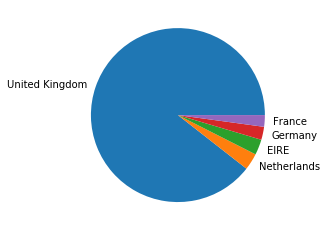

In [20]:
plt.pie(pctrevbycountry.head(5), labels = ["United Kingdom", "Netherlands", "EIRE", "Germany","France"])  
plt.show()

Unsurprisingly (for a UK based retailer), buyers from the UK are the biggest customers at 84 percent of total revenue. The next largest contributers are the Netherlands, Ireland, Germany, and France; Each only contributing an average of 2.5 percent.    

These numbers indicate potential markets for growth, particularly in other Western European countries 
such as the Netherlands that make up the bulk of the remaining 16 percent of revenue.

### 2011 Revenue stream by customer:

Total revenue in $:

In [46]:
revbycust = data.groupby(['CustomerID','Country']).sum().round(2).sort_values(["Revenue"], ascending=False)
revbycust.head(10)[["Quantity", "Revenue"]]

,,Quantity,Revenue
CustomerID,Country,,
14646.0,Netherlands,196719,279489.02
18102.0,United Kingdom,64122,256438.49
17450.0,United Kingdom,69029,187482.17
14911.0,EIRE,77180,132572.62
12415.0,Australia,77242,123725.45
14156.0,EIRE,57025,113384.14
17511.0,United Kingdom,63012,88125.38
16684.0,United Kingdom,49390,65892.08
13694.0,United Kingdom,61803,62653.10


Here we see something unexpected. Our biggest customer (#14646) is located in the Netherlands and not the UK. In fact, out of the top six customers, only two are UK buyers (#18102 and #17450) 

Percent of total revenue:

In [43]:
revbycustpct = (revbycust.head(10)/revsum)*100
revbycustpct.head(10)["Revenue"]

CustomerID  Country       
14646.0     Netherlands       2.867216
18102.0     United Kingdom    2.630746
17450.0     United Kingdom    1.923338
14911.0     EIRE              1.360033
12415.0     Australia         1.269272
14156.0     EIRE              1.163183
17511.0     United Kingdom    0.904059
16684.0     United Kingdom    0.675972
13694.0     United Kingdom    0.642744
15311.0     United Kingdom    0.609570
Name: Revenue, dtype: float64

We can see that the highest revenue generating customer contributed less than 3 percent to total revenue. It would appear that the retailer is not reliant on any particular customer and that its revenue stream is diversified across many customers. 

*This may indicate a lack of customer loyalty to the seller, but it could also be due to other competitors offering lower prices. Or it could be that the retailer is selling to smaller businesses who do not purchase large amounts of inventory. My guess is the latter, but we must test these hypotheses to verify whether or not these variables have a significant impact (or any impact at all) on revenue. A linear regression model could be helpful here.

# What were the top selling products?

Total revenue in $:

In [50]:
revbyproduct= data.groupby(["StockCode","Description"]).sum().round(2).sort_values(["Revenue"], ascending=False)

In [51]:
revbyproduct.head(10)[["Quantity", "Revenue"]]

,,Quantity,Revenue
StockCode,Description,,
DOT,DOTCOM POSTAGE,707,206245.48
22423,REGENCY CAKESTAND 3 TIER,13033,164762.19
47566,PARTY BUNTING,18022,98302.98
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025,97715.99
85099B,JUMBO BAG RED RETROSPOT,47363,92356.03
23084,RABBIT NIGHT LIGHT,30680,66756.59
POST,POSTAGE,3003,66230.64
22086,PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
84879,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73


*For purposes of this analysis, we will exclude stockcode(s) "DOT" and "POST" as they look like they might be shipping revenue. In this case clarification from the company is necessary.

The top 5 products in terms of sales revenue (excluding "DOT" and "POST") are "REGENCY CAKESTAND 3 TIER", "PARTY BUNTING", "WHITE HANGING HEART T-LIGHT HOLDER", "JUMBO BAG RED RETROSPOT", and "RABBIT NIGHT LIGHT"